In [1]:
import numpy as np
import pandas as pd
from skbio.stats.composition import clr
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from debiasm.torch_functions import rescale
from scipy.stats import pointbiserialr, mannwhitneyu
from matplotlib.colors import LogNorm, Normalize

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black'
            }, 
       font_scale=2)
np.random.seed(0)

### description of experiment
- we generate a set of 50 positive and 50 negative samples
- samples w/ a positive `y` have 30 features drawn from a uniform distribution, and one that is empty
- samples w/ a negative `y` have 20 features drawn from a uniform distribution, and 11 empty features. 
- By construction, the 31st feature is empty for all samples; question: will a clr transform introduce an association with `y` for that empty sample?
- We give all features an added pseudocount of $10^{-6}$, before which we rescale all samples to represent a relative abundance space
- Next, we run clr transfom using scipy.stats.composition's implementation

In [2]:
n_samples=100
frac_pos=.5
n_features_both = 20
n_features_pos = 10
n_features_empty = 1

n_pos = int( n_samples*frac_pos )
n_neg = n_samples-n_pos
# X = np.zeros((n_samples,
#              n_features_both + \
#              n_features_pos + \
#              n_features_empty
#              ))

X = np.hstack((
    np.vstack( ( np.random.uniform(size=( n_pos, n_features_both + n_features_pos )), 
            
                np.hstack(( np.random.uniform(size = ( n_neg, n_features_both )), 
                            np.zeros((n_neg, n_features_pos))
                          ) ))), 
    np.zeros((n_samples, n_features_empty)) 
        )) 


y = np.array([1]*n_pos + [0]*n_neg)

rsc_df = rescale(X)
pseudocount = 10**np.floor(np.log10(rsc_df[rsc_df != 0].min()))

p-value of transformed empty feature and outcome:

In [3]:
# X_clr = clr( rescale( pseudocount + rescale(X) ) ) ## the second `rescale` is different

In [4]:
pseudo_list = np.logspace(-8, -1, 8)

In [5]:
rsc_df = rescale(X)

In [6]:
varied_pseudo_efeats = np.vstack( [ clr( rescale( pseudo_ + rsc_df ) )[:, -1] 
                                    for pseudo_ in pseudo_list ] ).T

In [7]:
vary_pseudo= pd.DataFrame( {pseudo_ : clr( rescale( pseudo_ + rsc_df ) )[:, -1] 
                                    for pseudo_ in pseudo_list } ).T\
                    .reset_index()

vary_pseudo.columns = ['pseudocount'] + \
                    ['Positive' if a else 'Negative' for a in y]#list(y)

vary_pseudo = vary_pseudo.melt(id_vars='pseudocount')

In [8]:
vary_pseudo['pseudocount']=vary_pseudo['pseudocount'].astype(str)

In [11]:
# vary_pseudo['Simulated label'] = vary_pseudo['variable']
# plt.figure(figsize=(14,8))
# ax=sns.barplot(
# # sns.boxplot(
#             x='pseudocount', 
#             y='value', 
#             hue='Simulated label', 
#             data=vary_pseudo, 
#             palette={'Negative':'#3b4ea2',
#                      'Positive':'#b11e23'}, 
#             ci=100
# #             fliersize=0
#            )
# # handles, labels = ax.get_legend_handles_labels()
# # sns.scatterplot(x='pseudocount', 
# #                 y='value', 
# #                 hue='Simulated label', 
# #                 data=vary_pseudo, 
# #                 color='black', 
# #                 s=10
# #                 )


# pval_thresh=0.01
# xaxis_name='pseudocount'

# sig_df = pd.DataFrame({pseudo_ :\
#             mannwhitneyu(
#                      vary_pseudo.loc[
#                          (vary_pseudo[xaxis_name]==vary_pseudo[xaxis_name]\
#                                   .value_counts().index.values[0])&\
#                         (vary_pseudo['pseudocount']==pseudo_)].value, 
#                      vary_pseudo.loc[
#                          (vary_pseudo[xaxis_name]==vary_pseudo[xaxis_name]\
#                                   .value_counts().index.values[1])&\
#                         (vary_pseudo['pseudocount']==pseudo_)].value
#                         ).pvalue
#                 for pseudo_ in pseudo_list
#                   }, index=[0])


# sig_df=sig_df.T.reset_index()
# sig_df.columns=['pseudocount', 'pvalue']
# sig_df['is_sig'] = sig_df.pvalue < pval_thresh
# sig_df['y_val'] = vary_pseudo.value.min() * 1.3
# sig_df['pseudocount'] = sig_df['pseudocount'].astype(float)


# print(sig_df)

# if sum(sig_df.is_sig)>0:
#     sns.swarmplot(x='pseudocount',
#                   y='y_val', 
#                   data = sig_df.loc[sig_df.is_sig].reset_index(), 
#                   marker='+',
#                   size= 25/2, 
#                   order=sig_df.pseudocount.unique(),
#                   ax=ax,
#                   color='red',
#                   linewidth=3.5/2
#                   )

#     sns.swarmplot(x='pseudocount', 
#                   y='y_val', 
#                   data = sig_df.loc[sig_df.is_sig].reset_index(), 
#                   marker='x',
#                   size= 18.5/2,
#                   order=sig_df.pseudocount.unique(),
#                   ax=ax,
#                   color='red',
#                   linewidth=3.5/2,
#                   )


# plt.xticks(ticks=range(len(pseudo_list)), 
#            labels=pseudo_list, 
#            rotation=90)
# # # plt.yscale('symlog')

# # plt.yticks([])
# plt.ylabel('Mean CLR of an empty feature')
# plt.xlabel('Pseudocount (added in relative abundance space)')
# # ax.legend(handles[:2], labels[:2], loc='lower right')
# plt.title('Compositional transforms intrduce differences in empty features\n'+\
#           'across all pseudocount values in silico')
# plt.show()

/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/op

    pseudocount  pvalue  is_sig      y_val
0  1.000000e-08     0.0    True -18.781905
1  1.000000e-07     0.0    True -18.781905
2  1.000000e-06     0.0    True -18.781905
3  1.000000e-05     0.0    True -18.781905
4  1.000000e-04     0.0    True -18.781905
5  1.000000e-03     0.0    True -18.781905
6  1.000000e-02     0.0    True -18.781905
7  1.000000e-01     0.0    True -18.781905


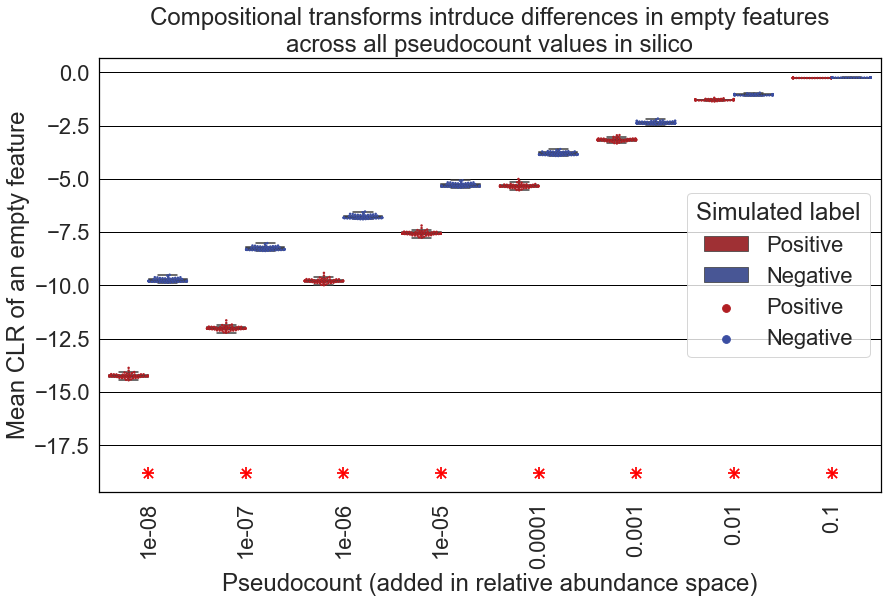

In [12]:
vary_pseudo['Simulated label'] = vary_pseudo['variable']
plt.figure(figsize=(14,8))
# ax=sns.barplot(
ax=sns.boxplot(
            x='pseudocount', 
            y='value', 
            hue='Simulated label', 
            data=vary_pseudo, 
            palette={'Negative':'#3b4ea2',
                     'Positive':'#b11e23'}, 
#             ci=100
            fliersize=0
           )
handles, labels = ax.get_legend_handles_labels()
sns.swarmplot(x='pseudocount', 
                y='value', 
                hue='Simulated label', 
                data=vary_pseudo, 
              palette={'Negative':'#3b4ea2',
                     'Positive':'#b11e23'},
#                 color='black', 
                s=2.5, 
                dodge=True
                )


pval_thresh=0.01
xaxis_name='pseudocount'

sig_df = pd.DataFrame({pseudo_ :\
            mannwhitneyu(
                     vary_pseudo.loc[
                         (vary_pseudo[xaxis_name]==vary_pseudo[xaxis_name]\
                                  .value_counts().index.values[0])&\
                        (vary_pseudo['pseudocount']==pseudo_)].value, 
                     vary_pseudo.loc[
                         (vary_pseudo[xaxis_name]==vary_pseudo[xaxis_name]\
                                  .value_counts().index.values[1])&\
                        (vary_pseudo['pseudocount']==pseudo_)].value
                        ).pvalue
                for pseudo_ in pseudo_list
                  }, index=[0])


sig_df=sig_df.T.reset_index()
sig_df.columns=['pseudocount', 'pvalue']
sig_df['is_sig'] = sig_df.pvalue < pval_thresh
sig_df['y_val'] = vary_pseudo.value.min() * 1.3
sig_df['pseudocount'] = sig_df['pseudocount'].astype(float)


print(sig_df)

if sum(sig_df.is_sig)>0:
    sns.swarmplot(x='pseudocount',
                  y='y_val', 
                  data = sig_df.loc[sig_df.is_sig].reset_index(), 
                  marker='+',
                  size= 25/2, 
                  order=sig_df.pseudocount.unique(),
                  ax=ax,
                  color='red',
                  linewidth=3.5/2
                  )

    sns.swarmplot(x='pseudocount', 
                  y='y_val', 
                  data = sig_df.loc[sig_df.is_sig].reset_index(), 
                  marker='x',
                  size= 18.5/2,
                  order=sig_df.pseudocount.unique(),
                  ax=ax,
                  color='red',
                  linewidth=3.5/2,
                  )


plt.xticks(ticks=range(len(pseudo_list)), 
           labels=pseudo_list, 
           rotation=90)
# # plt.yscale('symlog')

# plt.yticks([])
plt.ylabel('Mean CLR of an empty feature')
plt.xlabel('Pseudocount (added in relative abundance space)')
# ax.legend(handles[:2], labels[:2], loc='lower right')
plt.title('Compositional transforms intrduce differences in empty features\n'+\
          'across all pseudocount values in silico')
plt.savefig('supp-plots/Fig-S2a.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/op

    pseudocount  pvalue  is_sig      y_val
0  1.000000e-08     0.0    True -18.781905
1  1.000000e-07     0.0    True -18.781905
2  1.000000e-06     0.0    True -18.781905
3  1.000000e-05     0.0    True -18.781905
4  1.000000e-04     0.0    True -18.781905
5  1.000000e-03     0.0    True -18.781905
6  1.000000e-02     0.0    True -18.781905
7  1.000000e-01     0.0    True -18.781905


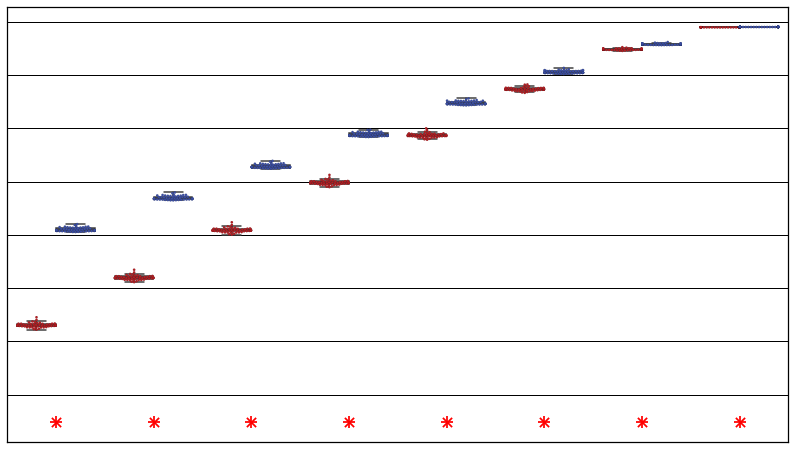

In [15]:
vary_pseudo['Simulated label'] = vary_pseudo['variable']
plt.figure(figsize=(14,8))
# ax=sns.barplot(
ax=sns.boxplot(
            x='pseudocount', 
            y='value', 
            hue='Simulated label', 
            data=vary_pseudo, 
            palette={'Negative':'#3b4ea2',
                     'Positive':'#b11e23'}, 
#             ci=100
            fliersize=0
           )
handles, labels = ax.get_legend_handles_labels()
sns.swarmplot(x='pseudocount', 
                y='value', 
                hue='Simulated label', 
                data=vary_pseudo, 
              palette={'Negative':'#3b4ea2',
                     'Positive':'#b11e23'},
              edgecolor='black',
              linewidth=.05,
#                 color='black', 
                s=2.5, 
                dodge=True
                )


pval_thresh=0.01
xaxis_name='pseudocount'

sig_df = pd.DataFrame({pseudo_ :\
            mannwhitneyu(
                     vary_pseudo.loc[
                         (vary_pseudo[xaxis_name]==vary_pseudo[xaxis_name]\
                                  .value_counts().index.values[0])&\
                        (vary_pseudo['pseudocount']==pseudo_)].value, 
                     vary_pseudo.loc[
                         (vary_pseudo[xaxis_name]==vary_pseudo[xaxis_name]\
                                  .value_counts().index.values[1])&\
                        (vary_pseudo['pseudocount']==pseudo_)].value
                        ).pvalue
                for pseudo_ in pseudo_list
                  }, index=[0])


sig_df=sig_df.T.reset_index()
sig_df.columns=['pseudocount', 'pvalue']
sig_df['is_sig'] = sig_df.pvalue < pval_thresh
sig_df['y_val'] = vary_pseudo.value.min() * 1.3
sig_df['pseudocount'] = sig_df['pseudocount'].astype(float)


print(sig_df)

if sum(sig_df.is_sig)>0:
    sns.swarmplot(x='pseudocount',
                  y='y_val', 
                  data = sig_df.loc[sig_df.is_sig].reset_index(), 
                  marker='+',
                  size= 25/2, 
                  order=sig_df.pseudocount.unique(),
                  ax=ax,
                  color='red',
                  linewidth=3.5/2
                  )

    sns.swarmplot(x='pseudocount', 
                  y='y_val', 
                  data = sig_df.loc[sig_df.is_sig].reset_index(), 
                  marker='x',
                  size= 18.5/2,
                  order=sig_df.pseudocount.unique(),
                  ax=ax,
                  color='red',
                  linewidth=3.5/2,
                  )


plt.xticks(ticks=range(len(pseudo_list)), 
           labels=pseudo_list, 
           rotation=90)
# # plt.yscale('symlog')

# plt.yticks([])
plt.ylabel('Mean CLR of an empty feature')
plt.xlabel('Pseudocount (added in relative abundance space)')
# ax.legend(handles[:2], labels[:2], loc='lower right')
plt.title('Compositional transforms intrduce differences in empty features\n'+\
          'across all pseudocount values in silico')
ax.get_legend().remove()
ax.set(
       yticklabels=[], 
       xticklabels=[])
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)

plt.savefig('supp-plots/Fig-S2a-no-axes.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()